In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 870.5/870.5 kB 9.9 MB/s eta 0:00:00



image 1/1 /content/IMG_4941.JPG: 640x480 1 Colgate, 1 Dettol, 2 Himalayas, 1 Kellogs, 418.6ms
Speed: 4.2ms preprocess, 418.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)
Detected labels:
Dettol, Count: 1
Colgate, Count: 1
Kellogs, Count: 1
Himalaya, Count: 1


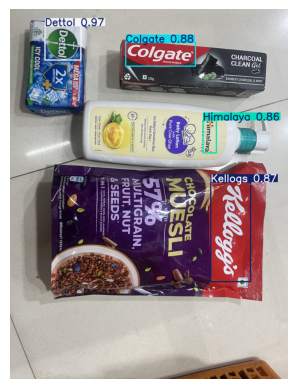

In [4]:
from collections import defaultdict
import matplotlib.pyplot as plt
import cv2
from ultralytics import YOLO

model = YOLO('/content/best.pt') 

# Running inference on the image
image_path = '/content/IMG_4941.JPG'
results = model(image_path)

label_counts = defaultdict(int)

# Setting the confidence threshold
confidence_threshold = 0.5

# Extract labels and count occurrences for detections with confidence > 0.5
for result in results:    
    filtered_boxes = []
    for box in result.boxes:
        if box.conf > confidence_threshold:
            filtered_boxes.append(box)
            class_id = int(box.cls) 
            label = model.names[class_id]
            label_counts[label] += 1 

    # Replace the original boxes with the filtered boxes
    result.boxes = filtered_boxes
print("Detected labels:")
# Print the counts for each detected label
for label, count in label_counts.items():
    print(f"{label}, Count: {count}")

# Visualizing the image with filtered bounding boxes
results[0].plot()

img_with_boxes = results[0].plot(show=False)
plt.imshow(cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
